In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Training Data, 6 datasets and only 49 days of the test data
Data_sets = [
    'D19_encoded.csv', 'D21_encoded.csv', 'GP21_encoded.csv',
    'MSE21_encoded.csv', 'NP21_encoded.csv', 'SRM22_encoded.csv'
]
test_data = pd.read_csv('SRM23_encoded.csv') 
test_data1 = test_data[:50] # Test data 1 is the number of tickets already sold
dataframes = []
for file in Data_sets:
    dataframes.append(pd.read_csv(file))
df = pd.concat(dataframes, axis=0)
new_df = [df,test_data1]
df = pd.concat(new_df, axis=0)
print(df)

   Created Date  Attendance Count
0    2019-07-16               102
1    2019-07-30               102
2    2019-07-31                19
3    2019-08-01                 2
4    2019-08-02                 1
..          ...               ...
45   2023-05-07                 1
46   2023-05-09                 7
47   2023-05-12                11
48   2023-05-15                14
49   2023-05-16                10

[486 rows x 2 columns]


In [3]:
df = df.rename(columns={'Created Date': 'ds', 'Attendance Count': 'y'})
df

,ds,y
0,2019-07-16,102
1,2019-07-30,102
2,2019-07-31,19
3,2019-08-01,2
4,2019-08-02,1
...,...,...
45,2023-05-07,1
46,2023-05-09,7
47,2023-05-12,11
48,2023-05-15,14


In [4]:
m = Prophet()
m.fit(df)

18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
forecast = m.predict(df)
predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(predictions)

            ds       yhat  yhat_lower  yhat_upper
0   2019-07-16  31.121094   10.597790   52.990470
1   2019-07-30  25.723293    4.048513   47.201850
2   2019-07-31  21.821582    1.012548   44.657667
3   2019-08-01  22.590194    1.563196   46.125062
4   2019-08-02  18.311069   -2.877772   40.404735
..         ...        ...         ...         ...
481 2023-05-07  -5.786902  -26.673903   16.986799
482 2023-05-09   7.495000  -15.520651   30.315898
483 2023-05-12   3.981282  -17.595489   27.217613
484 2023-05-15   3.920575  -19.130464   26.665474
485 2023-05-16   6.415688  -16.748685   28.332306

[486 rows x 4 columns]


In [6]:
last_date = forecast['ds'].max()
end_date_str = input("Enter last date of event (YYYY-MM-DD): ")
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
periods = (end_date - last_date).days
periods

Enter last date of event (YYYY-MM-DD):  2023-07-18


63

In [28]:
future_dataframe = m.make_future_dataframe(periods=periods)
future_dataframe = future_dataframe[future_dataframe['ds'] > last_date]

forecast = m.predict(future_dataframe )
#forecast= round(forecast[forecast['yhat']>0])
#forecast['yhat'] = forecast['yhat'].abs()
result = forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
print(result.tail())

           ds       yhat  yhat_upper  yhat_lower
58 2023-07-14   7.527144   30.742962  -15.972918
59 2023-07-15  -3.111522   17.966393  -25.700744
60 2023-07-16  -0.968447   22.713627  -24.042708
61 2023-07-17  10.680253   32.472167  -10.506011
62 2023-07-18  13.892178   34.267018   -7.699565


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


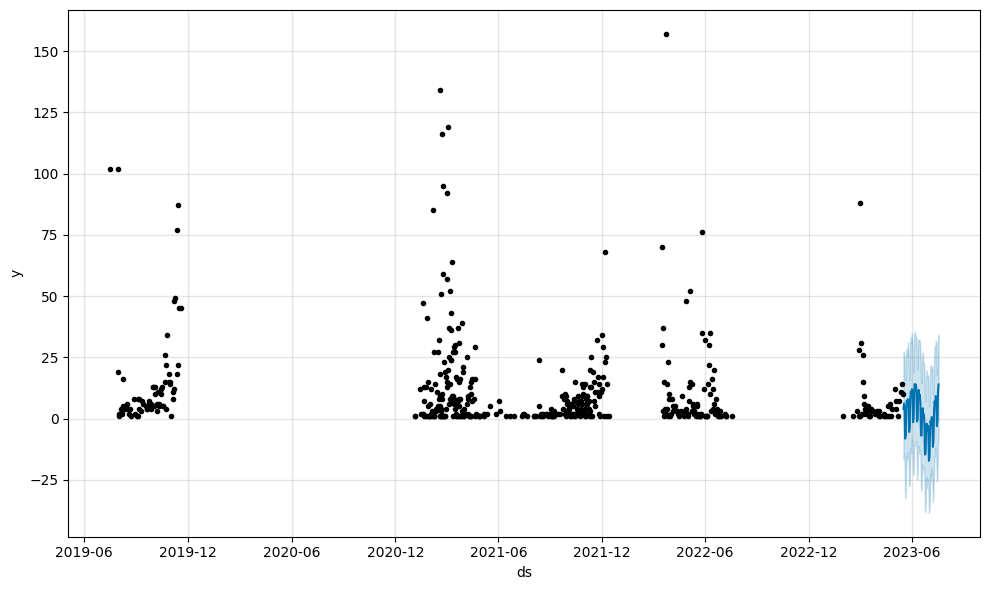

In [29]:
fig1 = m.plot(forecast)

In [30]:
# Actual sold, this dataset is to be used to compare the forecasted vs actual 
test_data2 = test_data[50:]
test_data2= test_data2.rename(columns={'Created Date': 'ds', 'Attendance Count': 'y'})
test_data2

,ds,y
50,2023-05-17,19
51,2023-05-18,25
52,2023-05-19,11
53,2023-05-20,2
54,2023-05-21,3
55,2023-05-22,18
56,2023-05-23,65
57,2023-05-24,69
58,2023-05-25,18
59,2023-05-26,8


In [31]:
test_data2['ds'] = pd.to_datetime(test_data2['ds'])
merged_data = test_data2[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')
merged_data

,ds,y,yhat
0,2023-05-17,19,3.881177
1,2023-05-18,25,6.108982
2,2023-05-19,11,3.363931
3,2023-05-20,2,-8.202561
4,2023-05-21,3,-6.792754
5,2023-05-22,18,4.339917
6,2023-05-23,65,7.270317
7,2023-05-24,69,5.195813
8,2023-05-25,18,7.894032
9,2023-05-26,8,5.614521


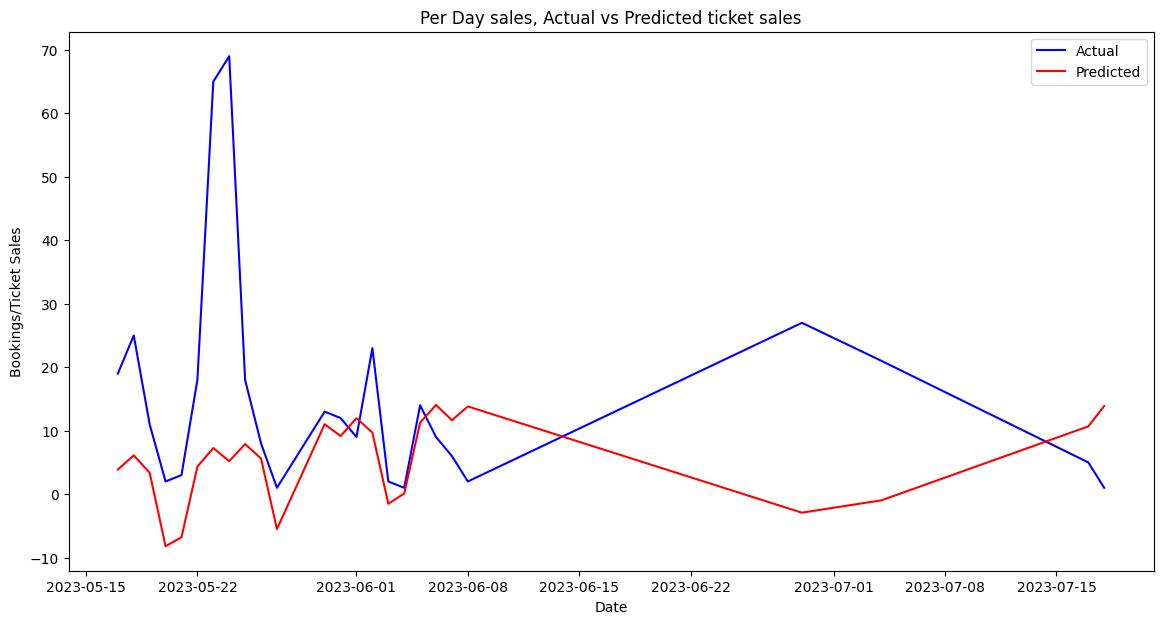

In [32]:
# Plotting the actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(merged_data['ds'], merged_data['y'], label='Actual', color='blue')
plt.plot(merged_data['ds'], merged_data['yhat'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Bookings/Ticket Sales')
plt.title('Per Day sales, Actual vs Predicted ticket sales')
plt.legend()
plt.savefig('Day_sales.jpg', bbox_inches='tight')
plt.show()

In [33]:
dfs = [df,test_data2]
combined_dfs = pd.concat(dfs, axis = 0)
forecast['ds'] = pd.to_datetime(forecast['ds'])
combined_dfs['ds'] = pd.to_datetime(combined_dfs['ds'])

Start_date = str(datetime.strptime(input("Enter First day for ticket sales, Format: (YYYY-MM-DD):"), '%Y-%m-%d'))
Sum_yhat = forecast[forecast['yhat']>0]
FDate_Ranges = df[df['ds'] >= Start_date]
TDate_Ranges = combined_dfs[combined_dfs['ds'] >= Start_date]
sum_yhat = Sum_yhat['yhat'].sum() + FDate_Ranges['y'].sum()
sum_y_actual = TDate_Ranges['y'].sum()
print("Sum of predicted ticket sale to the D:Day:", round(sum_yhat))
print("Sum of actual Ticket Sales from the Test Data:", sum_y_actual)

Enter First day for ticket sales, Format: (YYYY-MM-DD): 2023-01-30


Sum of predicted ticket sale to the D:Day: 623
Sum of actual Ticket Sales from the Test Data: 741


In [34]:
# filter for forecasted data based on each day tickets were sold in the test_data
predicted = forecast[forecast['ds'].isin(test_data2['ds'])]

# Extract predicted and actual values
y_pred = predicted['yhat']
y_true = test_data2['y']

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
# Optionally calculate other metrics like MAPE if needed

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 13.48200238621738
Mean Squared Error (MSE): 423.0258782609841
Root Mean Squared Error (RMSE): 20.567592913634403


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (abs(y_true - y_pred) / y_true).mean()
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 16.81%
